# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here
Property_details = pd.read_csv('Property_details.csv',encoding = 'latin') 
Order_details = pd.read_csv('Order_details.csv',encoding = 'latin')

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [3]:
#(1a)
Property_details['count_84100'] = Property_details.zipcode.apply(lambda x: 1 if x == 84100 else 0)
Property_details.count_84100.sum()

52

In [4]:
#(1b)
property_84100 = Property_details[Property_details['count_84100'] == 1]
property_84100['starrating'].describe()

count    52.000000
mean      2.846154
std       0.751068
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: starrating, dtype: float64

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [5]:
import datetime

In [6]:
#(2a)
def week_day(x):
    month,day,year = map(int,x.split('/'))
    daynum = datetime.date(year,month,day).weekday()
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturaday','Sunday']
    return days[daynum]
    
Order_details['weekday'] = Order_details['reservation date'].apply(lambda x: week_day(x))
Order_details['weekday']

0         Saturaday
1         Saturaday
2            Friday
3         Saturaday
4         Saturaday
            ...    
165868      Tuesday
165869      Tuesday
165870      Tuesday
165871      Tuesday
165872      Tuesday
Name: weekday, Length: 165873, dtype: object

In [7]:
#(2b)
Order_details['weekday'].value_counts().sort_values(ascending = False)

Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturaday    20574
Name: weekday, dtype: int64

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [8]:
#(3a)
Order_details['roomamenities'] = Order_details['roomamenities'].astype('str')
amenities = {}

for i,r in Order_details.iterrows():
    amenity = r['roomamenities'].split(': ;')
    for a in amenity:
        if a == '':
            break
        if a in amenities.keys():
            amenities[a] += 1
        else:
            amenities[a] = 1

top = sorted(amenities.items(),key = lambda x: x[1],reverse = True)[:10]
least = sorted(amenities.items(),key = lambda x: x[1],reverse = False)[:10]

print(f'The top 10 common room amenities are {top}')
print(f'The least 10 common room amenities are {least}')

The top 10 common room amenities are [('Air conditioning', 161054), ('In-room safe box', 161054), ('Free Wi-Fi in all rooms!', 157613), ('Hair dryer', 127316), ('Toiletries', 119993), ('Heating', 119196), ('Desk', 114593), ('Telephone', 113827), ('Closet', 113368), ('Towels', 106225)]
The least 10 common room amenities are [('Open air bath privileges', 12), ('Hot tub', 13), ('Vending machine', 24), ('Humidifier', 45), ('TV [in bathroom]', 58), ('Internet access ï¿?LAN', 72), ('First aid kit', 98), ('Air purifier', 103), ('In-room tablet', 161), ('Wi-Fi [free]', 196)]


In [9]:
#3(b)
amenity_percentage = {}
reservations = Order_details.shape[0]

for k,v in amenities.items():
    amenity_percentage[k] = (v/reservations)*100

print(amenity_percentage)

{'Air conditioning': 97.09476527222634, 'Alarm clock': 24.08830852519699, 'Carpeting': 42.91777444189229, 'Closet': 68.34626491351817, 'Coffee/tea maker': 47.37479879184677, 'Desk': 69.08478173060112, 'DVD/CD player': 4.058526704165235, 'Fan': 12.297360028455504, 'Free Wi-Fi in all rooms!': 95.02028660481211, 'Hair dryer': 76.75510782345529, 'Heating': 71.85979635021975, 'In-room safe box': 97.09476527222634, 'Ironing facilities': 41.58422407504537, 'Linens': 46.73334418500901, 'Mini bar': 31.153955134349776, 'Seating area': 25.572576609815943, 'Toiletries': 72.34028443447697, 'Towels': 64.03995828133571, 'TV [flat screen]': 16.88460448656502, 'Fireplace': 1.0767273757633853, 'Full kitchen': 2.278249021842012, 'High chair': 2.5899332621945703, 'Microwave': 4.0326032567084455, 'Separate dining area': 5.918986212343178, 'Sofa': 16.63501594593454, 'TV': 18.449657267909785, 'Washing machine': 1.1912728412701283, 'Dishwasher': 1.4251867392523196, 'Refrigerator': 18.42915965829279, 'Clothes 

## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [10]:
#4(a)
non_zeroprice = Order_details[Order_details['onsiteprice'] != 0].groupby('propertycode')['onsiteprice'].median()

def replaceprice(x):
    x = x.values.tolist()
    if x[1] == 0:
        return non_zeroprice[x[0]]
    else:
        return x[1]

Order_details['replaced onsiteprice'] = Order_details[['propertycode','onsiteprice']]\
                                                            .apply(lambda x: replaceprice(x), axis = 1)

Order_details['replaced onsiteprice']

0          82.36
1         636.09
2         591.74
3         881.48
4         897.53
           ...  
165868     81.83
165869     89.80
165870     99.78
165871     70.13
165872     70.13
Name: replaced onsiteprice, Length: 165873, dtype: float64

In [11]:
#4(b)
df_mxminprice = Order_details.groupby('propertycode').agg({'replaced onsiteprice':['max','min']})

df_mxminprice.columns = ['Maximum', 'Minimum']
df_mxminprice.index.name = 'hotelcode'

maxprice_max = df_mxminprice['Maximum'].max()
maxprice_min = df_mxminprice['Maximum'].min()

def normalize(x):
    x = x.tolist()
    return (x[0]-maxprice_min)/(maxprice_max-maxprice_min)

df_mxminprice['Normalized Maximum'] = df_mxminprice.apply(lambda x: normalize(x),axis = 1)

df_mxminprice.to_csv('Mx_Min Price.csv')
df_mxminprice.head()

,Maximum,Minimum,Normalized Maximum
hotelcode,,,
31,374.73,219.52,0.020083
56,149.51,73.46,0.007620
97,468.83,259.76,0.025290
138,321.84,169.66,0.017156
147,226.18,122.90,0.011863


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 2 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 100 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 100 due to price fluctuation. 


In [12]:
from pandasql import sqldf

In [39]:
list=[1,2,3,4,5,6]
list[~3]

3

In [13]:
#5(a) 
infoa = Order_details.merge(Property_details,how = 'inner',left_on = 'propertycode',right_on = 'propertyid') \
.loc[:,['propertycode','maxoccupancy','propertytype','closed','hotelblock','onsiteprice']]
orders_a = sqldf("SELECT propertycode,onsiteprice FROM infoa WHERE maxoccupancy >= 2 \
AND propertytype = 'Hotels' AND closed == 'N' AND hotelblock is null")
available_hotels_a = orders_a['propertycode'].unique().shape[0]

available_hotels_a

6407

In [14]:
#5(b)
max_onsiteprice = orders_a.groupby('propertycode')['onsiteprice'].max().reset_index()
max_onsiteprice.rename(columns={"onsiteprice":"max_onsiteprice"},inplace = True)
infob = orders_a.merge(max_onsiteprice,how = "inner",on = "propertycode")
orders_b = sqldf("SELECT propertycode,max_onsiteprice FROM infob WHERE max_onsiteprice <= 100")
available_hotels_b = orders_b["propertycode"].unique().shape[0]

available_hotels_b

1713

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [15]:
#(a) 
df_merged_1 = Property_details.merge(Order_details,how = 'inner',left_on = 'propertyid',right_on = 'propertycode')

df_hotel = df_merged_1.groupby('propertyid')['replaced onsiteprice'].mean().reset_index()

df_merged_2 = Property_details.merge(df_hotel,how = 'inner',on = 'propertyid')\
            .filter(items = ['propertyid', 'propertyname', 'city', 'country', 'zipcode', 'address',\
                           'replaced onsiteprice'],axis = 1)      

df_country = df_merged_2.groupby('country',as_index = False)['replaced onsiteprice'].max()

df_result_a = df_country.merge(df_merged_2,how = 'left',on = ['replaced onsiteprice','country'])\
            .sort_values('replaced onsiteprice').set_index('country')
df_result_a

,replaced onsiteprice,propertyid,propertyname,city,zipcode,address
country,,,,,,
Estonia,200.326364,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143.0,Ravala Street 3
Latvia,214.780517,99770,Radisson Blu Elizabete Hotel,Riga,NaN,Elizabetes Iela 73
Slovenia,231.935565,2729537,Hotel Sava,Rogaska Slatina,3250.0,Zdraviliski trg 6
Slovakia,234.076667,325384,Apartmanovy Dom TatraTravel Smokovec,Vysoke Tatry,6201.0,Novy Smokovec 72
Poland,241.548607,272128,Doubletree by Hilton Hotel Lodz,Lodz,NaN,29 Lakowa Street
Luxembourg,285.215000,118921,Hotel Parc Beaux Arts,Luxembourg,2536.0,1 Rue Sigefroi
Denmark,288.985946,6720996,The Square,Copenhagen,NaN,Radhuspladsen 14
Sweden,293.379286,5925673,"Slottsholmen, BW Premier Collection",Vastervik,59338.0,Slottsholmsvagen 10
Lithuania,297.371667,313224,Park Villa,Vilnius,NaN,Vaidilutes g. 6A


In [16]:
#(b) 
df_country = df_merged_2.groupby('country',as_index = False)['replaced onsiteprice'].min()

df_result_b = df_country.merge(df_merged_2,how = 'left',on = ['replaced onsiteprice','country'])\
            .sort_values('replaced onsiteprice').set_index('country')
df_result_b

,replaced onsiteprice,propertyid,propertyname,city,zipcode,address
country,,,,,,
Romania,11.800000,1966150,Hanul cu Flori,Braila,810077.0,"Soseaua Focsani, Km 5"
Austria,12.060000,6537481,Dolomitenhotel,Lienz,9900.0,2 Dolomitenstrasse
Portugal,13.030000,974553,Hotel do Cais,Viana Do Castelo,NaN,"Estrada Nacional 13, Rua das flores 115, Darque"
Czech Republic,14.800000,390933,Hotel Praded Jesenik,Jesenik,79001.0,Dukelska 178
Bulgaria,18.826667,449128,Family Hotel Natalis,Hisarya,4180.0,20 Geo Milev Str.
Poland,21.420000,8115168,Setpol 1,Bahn,NaN,J3R3+WG
Hungary,26.268000,454523,Hotel Fama,Hodmezovasarhely,6800.0,Szeremlei utca 7.
Italy,27.186667,7083537,L' Isola della Fanciulla,Salve,73050.0,"Corso Colombo, 3"
United Kingdom,27.440000,3755609,Travelodge Sunderland High Street West,Sunderland,NaN,High Street West


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1: Which country has the highest average star rating?

**Question 2: Which country has the highest average discount?

**Question 3: Are there any relationship between star rating and discount?

**Question 4: Which reservation date is the most popular?

**Question 5: How does max occupancy affect onsiteprice?


In [17]:
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

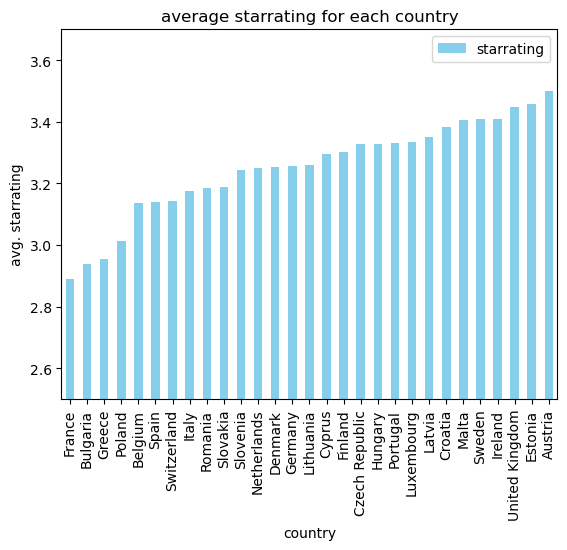

In [18]:
# Your code to answer Question 1
Q1_starbycountry = Property_details.groupby('country',as_index = False)['starrating'].mean().sort_values('starrating')
Q1_starbycountry.plot(kind = 'bar', x = 'country',ylim = [2.5,3.7], y = 'starrating', ylabel = 'avg. starrating', \
          color = 'skyblue',title = 'average starrating for each country')
plt.show()

##By grouping countries and averaging starrating column we explore hotels' starratings among different countries \
#to see if there's any pattern or relationship.

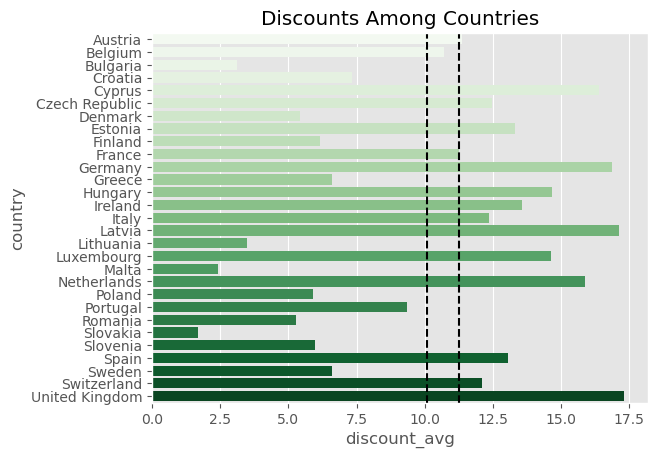

In [19]:
# Your code to answer Question 2
Q2info = Order_details.merge(Property_details,how = "inner",left_on = "propertycode",right_on = "propertyid") \
.loc[:,["propertycode","maxoccupancy","country","discount"]]
coun_dis = sqldf("SELECT country,avg(discount) as discount_avg FROM Q2info GROUP BY country")
country = coun_dis["country"]
disount = coun_dis["discount_avg"]

plt.style.use("ggplot")
fig,ax = plt.subplots()
ax.set(title = "Discounts Among Countries",xlabel = "average discounts",ylabel = "country")
sns.barplot(y = "country",x = "discount_avg",data = coun_dis,orient = "h",palette = "Greens")
mean_discount_avg = coun_dis.discount_avg.mean()
median_discount_avg = coun_dis.discount_avg.median()
ax.axvline(x = mean_discount_avg,color = "black",label = "average",linestyle = "--")
ax.axvline(x = median_discount_avg,color = "black",label = "median",linestyle = "--")

##By grouping countries and averaging discounts column we explore average discounts among different countries \
#to see whether discounts are correlated with hotel occupancy and tourism in the country. 

[Text(0.5, 1.0, 'Average Discount Rate'), Text(0, 0.5, 'rate')]

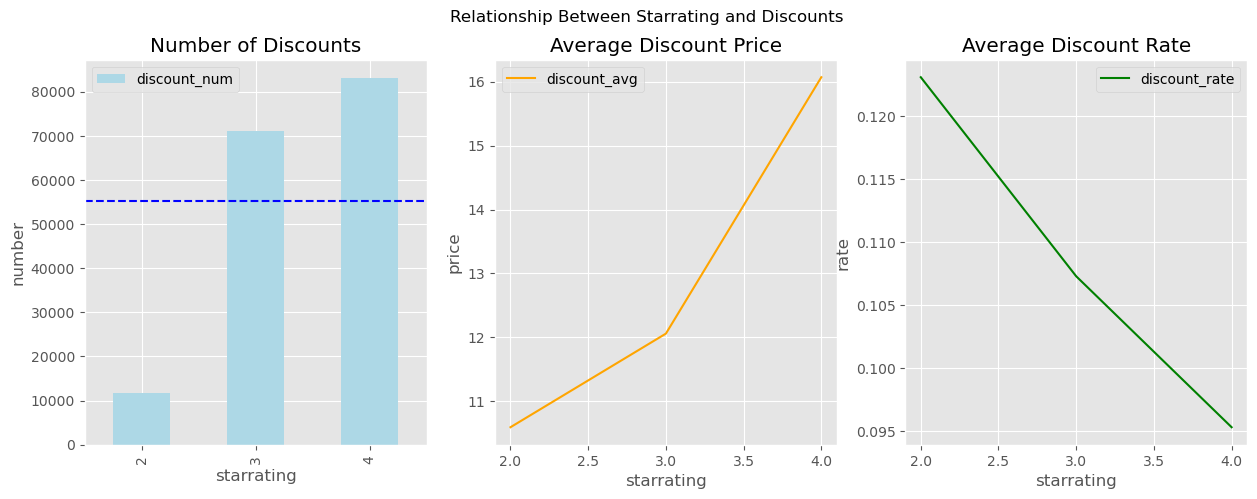

In [20]:
# Your code to answer Question 3
Q3info = Order_details.merge(Property_details,how = "left",left_on = "propertycode",right_on = "propertyid") \
.loc[:,["starrating","discount","onsiteprice"]]
star_dis = sqldf("SELECT starrating,count(discount) as discount_num, avg(discount) as discount_avg, \
avg(discount)/avg(onsiteprice) as discount_rate FROM Q3info GROUP BY starrating")

plt.style.use("ggplot")
fig,(ax0,ax1,ax2) = plt.subplots(nrows = 1,ncols = 3, figsize = (15,5))
fig.suptitle("Relationship Between Starrating and Discounts")

star_dis.plot(kind = "bar",x = "starrating",y = "discount_num",color = 'lightblue', \
              label = "discount_num", ax = ax0)
mean_discount_num = star_dis.discount_num.mean()
ax0.set(title = "Number of Discounts",ylabel = "number")
ax0.axhline(mean_discount_num,color = "b",linestyle = "--")

star_dis.plot(kind = "line",x = "starrating",y = "discount_avg",color = 'orange', \
              label = "discount_avg", ax = ax1)
ax1.set(title = "Average Discount Price",ylabel = "price")

star_dis.plot(kind = "line",x = "starrating",y = "discount_rate",color = 'green', \
              label = "discount_rate", ax = ax2)
ax2.set(title = "Average Discount Rate",ylabel = "rate")

##By grouping starrating and explore the relationship it has with discount nummbers, average discounts and average \
#discounts rate, we explore the impact and benefits discounts may have on hotels. The result is helpful when \
#making discount policy.

In [21]:
import time

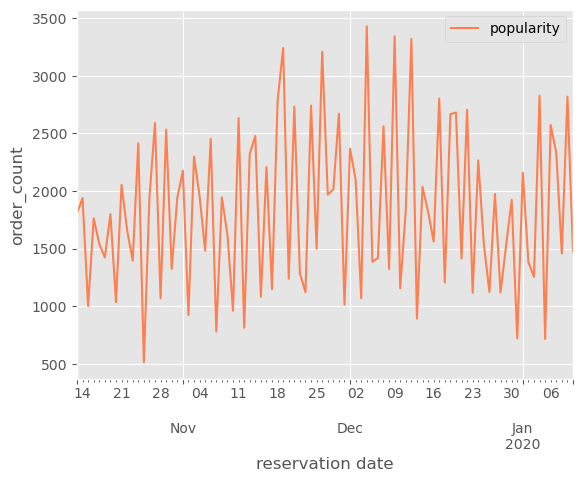

In [22]:
# Your code to answer Question 4
Q4_datepop = Order_details.groupby('reservation date')['reservation date'].count().to_frame()\
                    .rename(columns = {'reservation date':'popularity'}).reset_index()
Q4_datepop['reservation date'] = Q4_datepop['reservation date'].apply(pd.to_datetime, format = '%m/%d/%Y')
Q4_datepop.sort_values(by = ['reservation date'],inplace = True)
Q4_datepop.plot(x = 'reservation date',y = 'popularity',ylabel = 'order_count',color = '#FF7F50')
plt.show()

##By grouping by the dates, and showing the counts we can explore the most popular order dates. The result \
#can get hotels ready for peak season ahead of time.

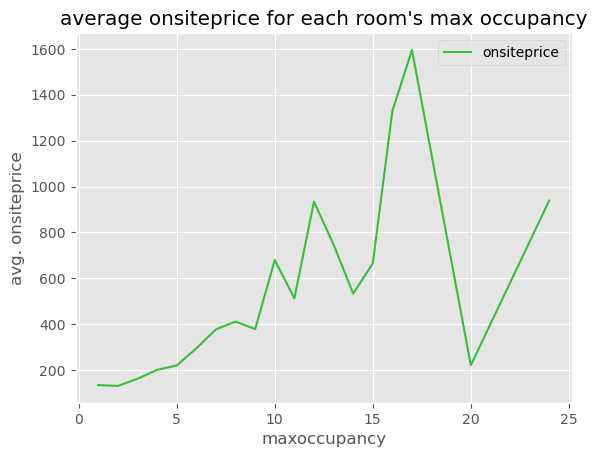

In [23]:
# Your code to answer Question 5
Q5_pricebyoccu = Property_details.merge(Order_details,how = 'inner',left_on = 'propertyid',right_on = 'propertycode')\
            .groupby('maxoccupancy',as_index = False)['onsiteprice'].mean()
Q5_pricebyoccu.plot(x = 'maxoccupancy',y = 'onsiteprice',ylabel = 'avg. onsiteprice',color = '#36BF36'\
          ,title = 'average onsiteprice for each room\'s max occupancy')
plt.show()

##By merging two datasets, we explore whether max occupancy affect onsite price. The result can give suggestions \
#to hotels about how to design their room type.

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


We mainly focus on attributes of country, starrating, discount and maxoccupancy. Findings for each question are as follow.

Q1: Austria has the highest rating and France has the lowest starrating which means we can promote Austria to those customers who expect higher hotel qualities but haven't decided the country yet to show more satisfying results. 

Q2: Countries whose averaging discounts are above the average level of all countries are tourists attractions. Other countries, in order to promote the development of tourism, can properly carry out some hotel incentives to attract more customers. 

Q3: By exploring the relationship between star ratings and discounts. Four-star hotels have the highest number of reservations and also the highest amount of actual discounts. But their discounts rate are the lowest. The overall tendency of consumer psychology to respond to promotions leads to stimulate consumption when more expensive goods occur at more favorable discounts. Hotels with high quality can seize the opportunity to run discount campaigns to increase their total profit.

Q4:The most popular order dates are around end of November and start of December, so we can do some promotions during the time not much people making reservations to keep the order amount more balanced. 

Q5: Price goes up when maxoccupancy increases, and reaches a summit at 17 then drops quickly, so in the system when people are more price sensitive, the system could show lower price with different occupancy to increase buying chances.

Significant Business Insights: A certain degree of discount can increase profits. Hotels with different star ratings in different regions should seize the right time to offer discount packages to attract more customers according to their market positioning. Diversification of room types with different capacity is also very beneficial.